In [21]:
import pandas as pd
file_path = "./ref/경상남도김해시_경전철역사별시간대별승하차인원정보_20241225.csv"
data = pd.read_csv(file_path, encoding="EUC-KR")
data.head()

,분류,영업일자,역사명,합계,00시 인원,01시 인원,02시 인원,03시 인원,04시 인원,05시 인원,...,14시 인원,15시 인원,16시 인원,17시 인원,18시 인원,19시 인원,20시 인원,21시 인원,22시 인원,23시 인원
0,승차,2023-12-15,사상,8915,0,0,0,0,36,300,...,433,478,503,638,664,446,408,270,270,178
1,승차,2023-12-15,괘법 르네시떼,1446,0,0,0,0,9,55,...,71,55,81,99,135,65,53,32,23,14
2,승차,2023-12-15,서부산 유통지구,1587,0,0,0,0,1,8,...,82,76,155,498,362,70,33,17,7,3
3,승차,2023-12-15,공항,5731,0,0,0,0,0,4,...,346,354,438,583,404,355,379,419,258,56
4,승차,2023-12-15,덕두,1454,0,0,0,0,0,7,...,65,55,106,321,285,54,37,30,21,3


In [22]:
columns = ['type','date','name','total']
time_col = [f"{i}~{i+1}H" for i in range(1,24)]
columns = columns + time_col + [ '24~1H' ]
data.columns = columns
data = data.loc[:,:'total']
data.head()
# data.tail()

,type,date,name,total
0,승차,2023-12-15,사상,8915
1,승차,2023-12-15,괘법 르네시떼,1446
2,승차,2023-12-15,서부산 유통지구,1587
3,승차,2023-12-15,공항,5731
4,승차,2023-12-15,덕두,1454


In [23]:
data1 = data.groupby(['name','date']).sum().reset_index()
data1

,name,date,type,total
0,가야대,2023-12-15,승차하차,6261
1,가야대,2023-12-16,승차하차,4607
2,가야대,2023-12-17,승차하차,3128
3,가야대,2023-12-18,승차하차,5131
4,가야대,2023-12-19,승차하차,5378
...,...,...,...,...
7912,평강,2024-12-21,승차하차,524
7913,평강,2024-12-22,승차하차,334
7914,평강,2024-12-23,승차하차,843
7915,평강,2024-12-24,승차하차,874


In [24]:
gdata = data1[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'], ascending=[True,True])
gdata.head(10)

,name,date,total
0,가야대,2023-12-15,6261
1,가야대,2023-12-16,4607
2,가야대,2023-12-17,3128
3,가야대,2023-12-18,5131
4,가야대,2023-12-19,5378
5,가야대,2023-12-20,5233
6,가야대,2023-12-21,5046
7,가야대,2023-12-22,5272
8,가야대,2023-12-23,4353
9,가야대,2023-12-24,3559


In [25]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,가야대,1765036
1,공항,3958348
2,괘법 르네시떼,1100102
3,김해대학,692133
4,김해시청,803089
5,대사,350135
6,대저,4808842
7,덕두,868479
8,등구,173083
9,박물관,1199556


In [26]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata = sdata.head(20)

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

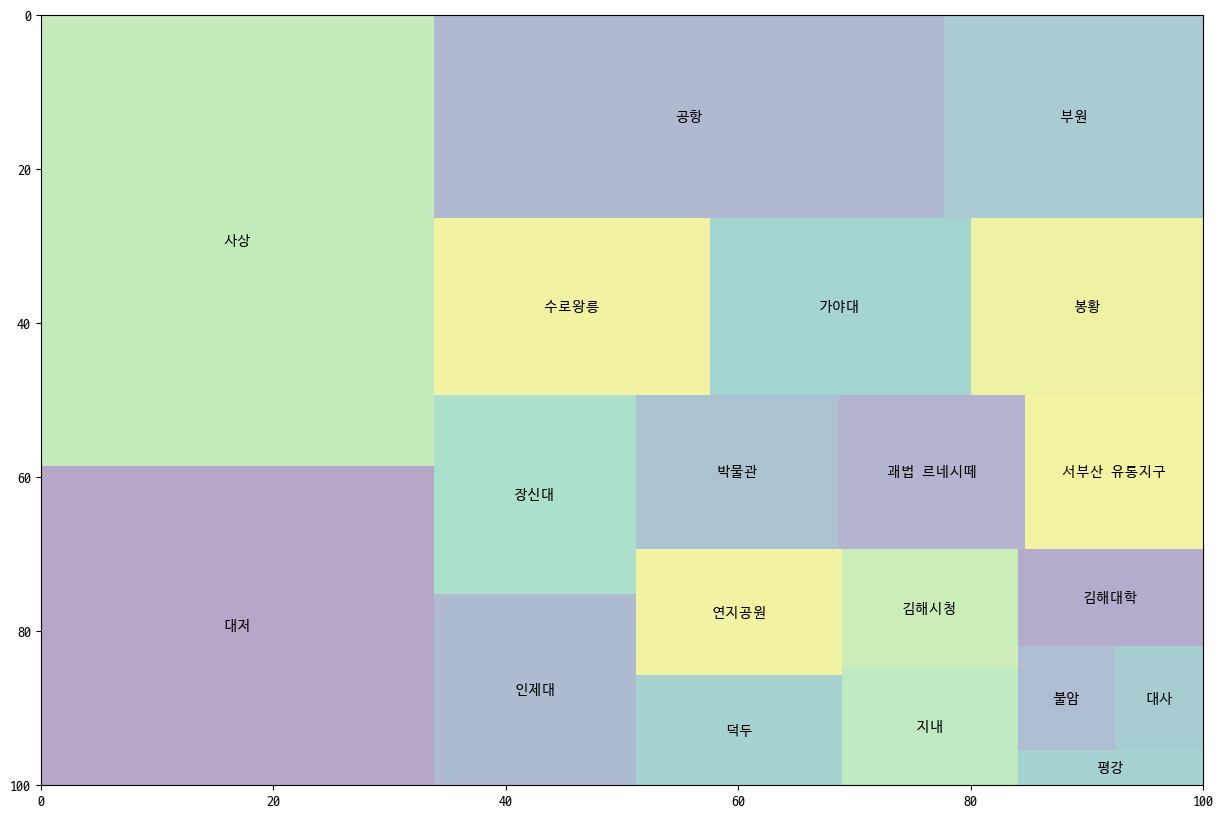

In [28]:
import squarify
plt.figure(figsize=(15,10))
squarify.plot(sizes=sdata['total'], label=sdata.name, alpha=0.4)
plt.rcParams['font.size']=10
plt.gca().invert_yaxis()
plt.show()